ЗАДАНИЕ №4: СЛОЖЕНИЕ ДВУХ СЛУЧАЙНЫХ ПРОЦЕССОВ

Параметры моделирования:
  μ1 = 1.0 [1/мес] → T1 = 1.0 мс
  μ2 = 0.5 [1/мес] → T2 = 2.0 мс
  Количество образцов: n = 60
  Количество экспериментов для суммы: m = 60
  Интервал моделирования: [0, 10] мес
  Количество интервалов гистограммы: 24

----------------------------------------------------------------------
ШАГ 1: Генерация исходных последовательностей
----------------------------------------------------------------------

Первые 5 значений процесса 1: [0.9821 0.0505 0.312  0.5131 1.8578]
Первые 5 значений процесса 2: [1.89   2.6087 0.3757 2.0614 2.5393]

----------------------------------------------------------------------
ШАГ 2: Построение гистограмм исходных процессов
----------------------------------------------------------------------

Процесс 1:
  Площадь под гистограммой: 1.000000 (должна быть ≈1)

Процесс 2:
  Площадь под гистограммой: 1.000000 (должна быть ≈1)

-------------------------------------------------------------

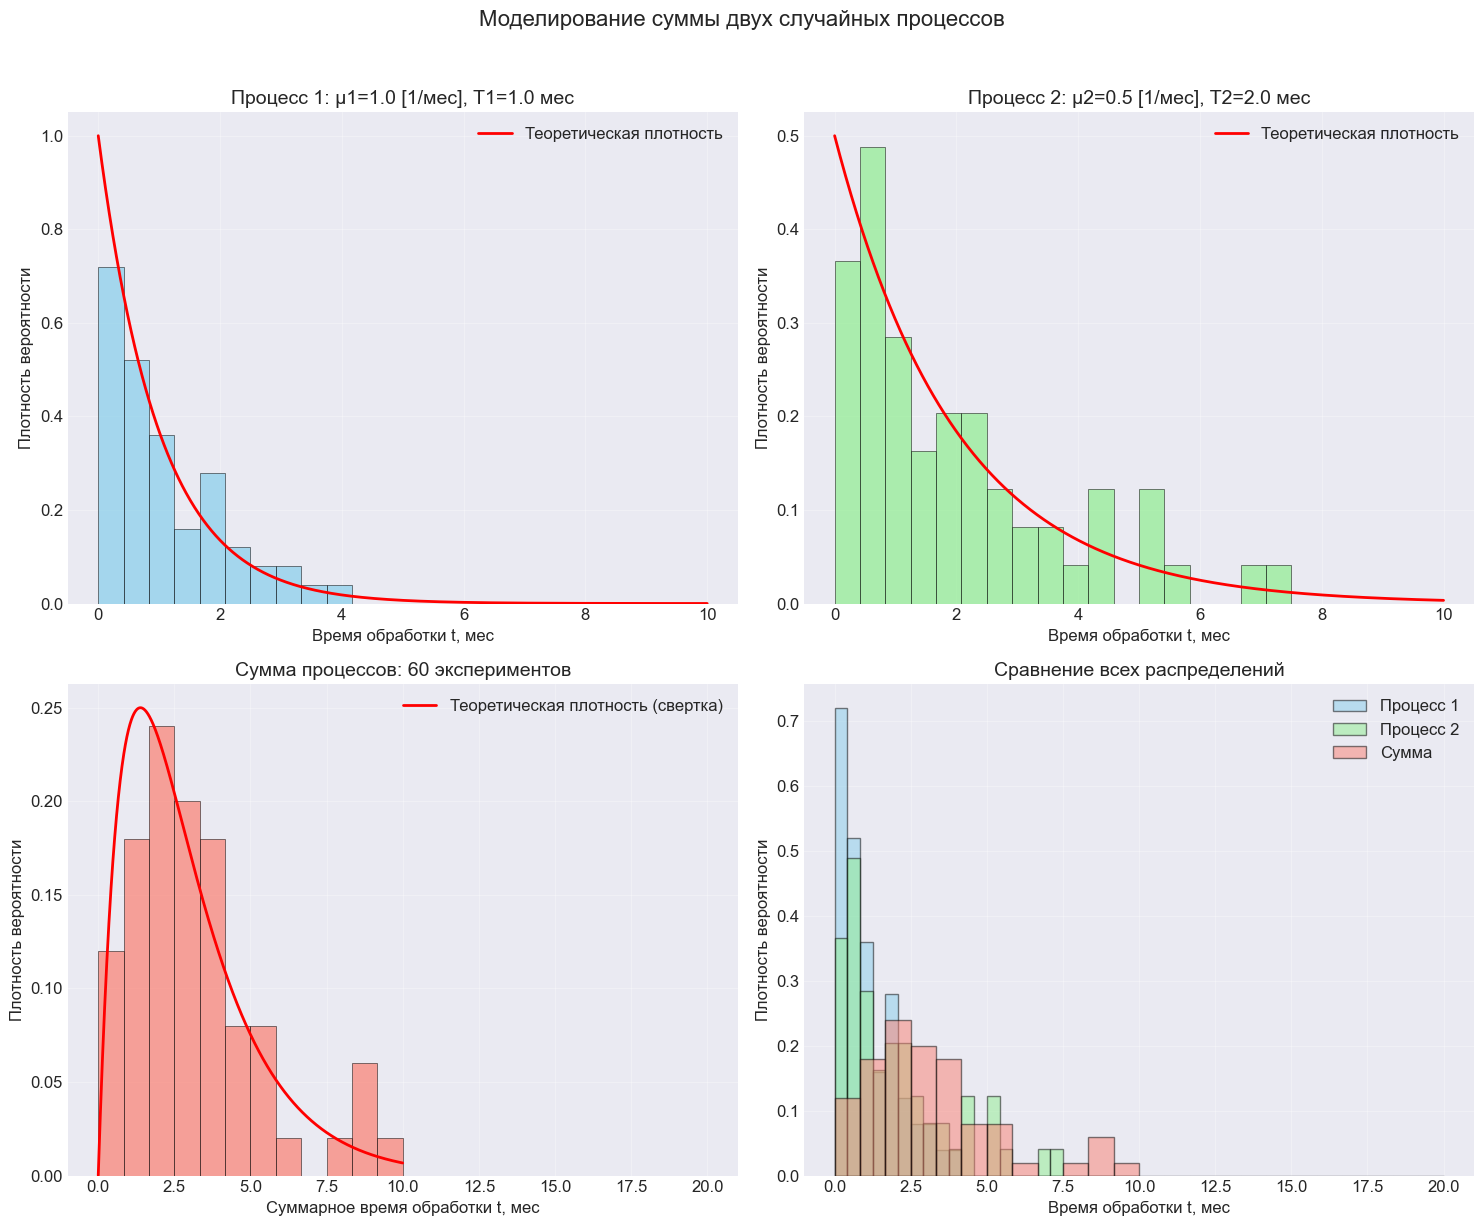


ЗАДАНИЕ №4 ВЫПОЛНЕНО


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Константы для красивого оформления графиков
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['font.size'] = 12

def generate_exponential_samples(mu, n, random_seed=None):
    """
    Генерирует выборку из экспоненциального распределения
    используя формулу обратного преобразования

    Parameters:
    -----------
    mu : float - интенсивность (1/среднее)
    n : int - количество образцов
    random_seed : int - seed для воспроизводимости

    Returns:
    --------
    samples : ndarray - сгенерированные значения
    """
    if random_seed is not None:
        np.random.seed(random_seed)

    # Генерация равномерно распределенных случайных чисел
    P = np.random.random(n)

    # Формула обратного преобразования: t = -1/μ * ln(P)
    samples = -1/mu * np.log(P)

    return samples

def build_histogram_data(samples, bins=24, range_limit=(0, 10)):
    """
    Строит гистограмму относительных частот

    Parameters:
    -----------
    samples : ndarray - входные данные
    bins : int - количество интервалов
    range_limit : tuple - диапазон значений

    Returns:
    --------
    hist : ndarray - относительные частоты
    bin_edges : ndarray - границы интервалов
    """
    hist, bin_edges = np.histogram(samples, bins=bins, range=range_limit, density=True)

    # Проверяем площадь под гистограммой (должна быть 1)
    bin_width = bin_edges[1] - bin_edges[0]
    area = np.sum(hist * bin_width)
    print(f"  Площадь под гистограммой: {area:.6f} (должна быть ≈1)")

    return hist, bin_edges

def simulate_sum_process(mu1, mu2, n_samples, n_experiments=60):
    """
    Моделирует сумму двух случайных процессов

    Parameters:
    -----------
    mu1, mu2 : float - интенсивности процессов
    n_samples : int - количество образцов для гистограмм
    n_experiments : int - количество экспериментов для суммы

    Returns:
    --------
    sum_samples : ndarray - массив сумм
    """
    sum_samples = []

    for i in range(n_experiments):
        # Генерируем два случайных числа P1 и P2
        P1 = np.random.random()
        P2 = np.random.random()

        # Получаем времена обработки по формуле обратного преобразования
        t1 = -1/mu1 * np.log(P1)
        t2 = -1/mu2 * np.log(P2)

        # Складываем
        t_sum = t1 + t2
        sum_samples.append(t_sum)

        if i < 5:  # Покажем первые 5 результатов
            print(f"  Эксперимент {i+1}: P1={P1:.4f}→t1={t1:.4f}, P2={P2:.4f}→t2={t2:.4f}, сумма={t_sum:.4f}")

    return np.array(sum_samples)

def plot_results(mu1, mu2, samples1, samples2, sum_samples, bins=24, range_limit=(0, 10)):
    """
    Визуализация результатов
    """
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # 1. Гистограмма первого процесса
    ax1 = axes[0, 0]
    hist1, bin_edges1, _ = ax1.hist(samples1, bins=bins, range=range_limit,
                                     density=True, alpha=0.7, color='skyblue',
                                     edgecolor='black', linewidth=0.5)
    ax1.set_xlabel('Время обработки t, мс', fontsize=12)
    ax1.set_ylabel('Плотность вероятности', fontsize=12)
    ax1.set_title(f'Процесс 1: μ1={mu1} [1/мс], T1={1/mu1:.1f} мс', fontsize=14)
    ax1.grid(True, alpha=0.3)

    # Добавляем теоретическую кривую
    x_theor = np.linspace(0, 10, 1000)
    y_theor1 = mu1 * np.exp(-mu1 * x_theor)
    ax1.plot(x_theor, y_theor1, 'r-', linewidth=2, label='Теоретическая плотность')
    ax1.legend()

    # 2. Гистограмма второго процесса
    ax2 = axes[0, 1]
    hist2, bin_edges2, _ = ax2.hist(samples2, bins=bins, range=range_limit,
                                     density=True, alpha=0.7, color='lightgreen',
                                     edgecolor='black', linewidth=0.5)
    ax2.set_xlabel('Время обработки t, мс', fontsize=12)
    ax2.set_ylabel('Плотность вероятности', fontsize=12)
    ax2.set_title(f'Процесс 2: μ2={mu2} [1/мс], T2={1/mu2:.1f} мс', fontsize=14)
    ax2.grid(True, alpha=0.3)

    # Добавляем теоретическую кривую
    y_theor2 = mu2 * np.exp(-mu2 * x_theor)
    ax2.plot(x_theor, y_theor2, 'r-', linewidth=2, label='Теоретическая плотность')
    ax2.legend()

    # 3. Гистограмма суммы
    ax3 = axes[1, 0]
    hist_sum, bin_edges_sum, _ = ax3.hist(sum_samples, bins=bins, range=(0, 20),
                                          density=True, alpha=0.7, color='salmon',
                                          edgecolor='black', linewidth=0.5)
    ax3.set_xlabel('Суммарное время обработки t, мс', fontsize=12)
    ax3.set_ylabel('Плотность вероятности', fontsize=12)
    ax3.set_title(f'Сумма процессов: {len(sum_samples)} экспериментов', fontsize=14)
    ax3.grid(True, alpha=0.3)

    # Добавляем теоретическую кривую для суммы (распределение Эрланга)
    # Для суммы двух экспоненциальных с разными параметрами
    if mu1 != mu2:
        # Формула для свертки двух экспоненциальных распределений
        y_sum = (mu1 * mu2 / (mu2 - mu1)) * (np.exp(-mu1 * x_theor) - np.exp(-mu2 * x_theor))
        ax3.plot(x_theor, y_sum, 'r-', linewidth=2, label='Теоретическая плотность (свертка)')
    ax3.legend()

    # 4. Сравнение всех трех распределений
    ax4 = axes[1, 1]
    ax4.hist(samples1, bins=bins, range=range_limit, density=True,
             alpha=0.5, color='skyblue', edgecolor='black', label='Процесс 1')
    ax4.hist(samples2, bins=bins, range=range_limit, density=True,
             alpha=0.5, color='lightgreen', edgecolor='black', label='Процесс 2')
    ax4.hist(sum_samples, bins=bins, range=(0, 20), density=True,
             alpha=0.5, color='salmon', edgecolor='black', label='Сумма')
    ax4.set_xlabel('Время обработки t, мс', fontsize=12)
    ax4.set_ylabel('Плотность вероятности', fontsize=12)
    ax4.set_title('Сравнение всех распределений', fontsize=14)
    ax4.grid(True, alpha=0.3)
    ax4.legend()

    plt.suptitle('Моделирование суммы двух случайных процессов', fontsize=16, y=1.02)
    plt.tight_layout()
    return fig

def print_statistics(samples1, samples2, sum_samples, mu1, mu2):
    """
    Вывод статистических характеристик
    """
    print("\n" + "="*70)
    print("СТАТИСТИЧЕСКИЕ ХАРАКТЕРИСТИКИ")
    print("="*70)

    print(f"\nПроцесс 1 (μ1={mu1}):")
    print(f"  Среднее экспериментальное: {np.mean(samples1):.4f} мс")
    print(f"  Среднее теоретическое:     {1/mu1:.4f} мс")
    print(f"  Дисперсия экспериментальная: {np.var(samples1):.4f}")
    print(f"  Дисперсия теоретическая:     {1/mu1**2:.4f}")

    print(f"\nПроцесс 2 (μ2={mu2}):")
    print(f"  Среднее экспериментальное: {np.mean(samples2):.4f} мс")
    print(f"  Среднее теоретическое:     {1/mu2:.4f} мс")
    print(f"  Дисперсия экспериментальная: {np.var(samples2):.4f}")
    print(f"  Дисперсия теоретическая:     {1/mu2**2:.4f}")

    print(f"\nСумма процессов:")
    print(f"  Среднее экспериментальное: {np.mean(sum_samples):.4f} мс")
    print(f"  Среднее теоретическое:     {1/mu1 + 1/mu2:.4f} мс")
    print(f"  Дисперсия экспериментальная: {np.var(sum_samples):.4f}")
    print(f"  Дисперсия теоретическая:     {1/mu1**2 + 1/mu2**2:.4f}")

def task4():
    """
    Основная функция для выполнения задания №4
    """
    print("="*70)
    print("ЗАДАНИЕ №4: СЛОЖЕНИЕ ДВУХ СЛУЧАЙНЫХ ПРОЦЕССОВ")
    print("="*70)

    # Параметры задачи
    mu1 = 1.0      # интенсивность первого процесса [1/мс]
    mu2 = 0.5      # интенсивность второго процесса [1/мс]
    n_samples = 60  # количество образцов для каждого процесса
    n_experiments = 60  # количество экспериментов для суммы
    bins = 24       # количество интервалов гистограммы
    range_limit = (0, 10)  # интервал моделирования

    print(f"\nПараметры моделирования:")
    print(f"  μ1 = {mu1} [1/мс] → T1 = {1/mu1} мс")
    print(f"  μ2 = {mu2} [1/мс] → T2 = {1/mu2} мс")
    print(f"  Количество образцов: n = {n_samples}")
    print(f"  Количество экспериментов для суммы: m = {n_experiments}")
    print(f"  Интервал моделирования: [0, 10] мс")
    print(f"  Количество интервалов гистограммы: {bins}")

    # Шаг 1: Генерация последовательностей
    print("\n" + "-"*70)
    print("ШАГ 1: Генерация исходных последовательностей")
    print("-"*70)

    np.random.seed(42)  # для воспроизводимости
    samples1 = generate_exponential_samples(mu1, n_samples)
    samples2 = generate_exponential_samples(mu2, n_samples)

    print(f"\nПервые 5 значений процесса 1: {samples1[:5].round(4)}")
    print(f"Первые 5 значений процесса 2: {samples2[:5].round(4)}")

    # Шаг 2: Построение гистограмм
    print("\n" + "-"*70)
    print("ШАГ 2: Построение гистограмм исходных процессов")
    print("-"*70)

    print("\nПроцесс 1:")
    hist1, bin_edges1 = build_histogram_data(samples1, bins, range_limit)

    print("\nПроцесс 2:")
    hist2, bin_edges2 = build_histogram_data(samples2, bins, range_limit)

    # Шаг 3: Получение вероятностей (уже в hist1, hist2)
    print("\n" + "-"*70)
    print("ШАГ 3: Вероятности для каждого интервала")
    print("-"*70)

    bin_width = bin_edges1[1] - bin_edges1[0]
    print(f"\nШирина интервала: {bin_width:.4f}")
    print("\nПервые 5 интервалов процесса 1:")
    for i in range(min(5, len(hist1))):
        print(f"  Интервал [{bin_edges1[i]:.2f}, {bin_edges1[i+1]:.2f}]: "
              f"вероятность = {hist1[i] * bin_width:.4f}, "
              f"плотность = {hist1[i]:.4f}")

    # Шаг 4-5: Моделирование суммы
    print("\n" + "-"*70)
    print("ШАГИ 4-5: Моделирование суммы двух процессов")
    print("-"*70)
    print("(используем формулу обратного преобразования, а не гистограммы)")

    sum_samples = simulate_sum_process(mu1, mu2, n_samples, n_experiments)

    # Шаг 6: Построение гистограммы для суммы
    print("\n" + "-"*70)
    print("ШАГ 6: Построение гистограммы для суммы")
    print("-"*70)

    hist_sum, bin_edges_sum = build_histogram_data(sum_samples, bins, (0, 20))

    # Статистика
    print_statistics(samples1, samples2, sum_samples, mu1, mu2)

    # Шаг 7: Визуализация
    print("\n" + "-"*70)
    print("ШАГ 7: Построение графиков")
    print("-"*70)

    fig = plot_results(mu1, mu2, samples1, samples2, sum_samples, bins, range_limit)
    plt.show()

    print("\n" + "="*70)
    print("ЗАДАНИЕ №4 ВЫПОЛНЕНО")
    print("="*70)

if __name__ == "__main__":
    task4()